In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

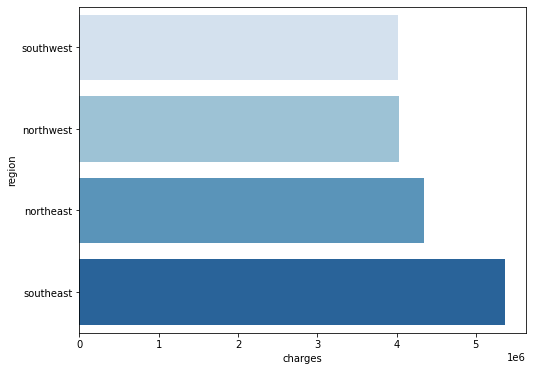

In [5]:
charges =df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')

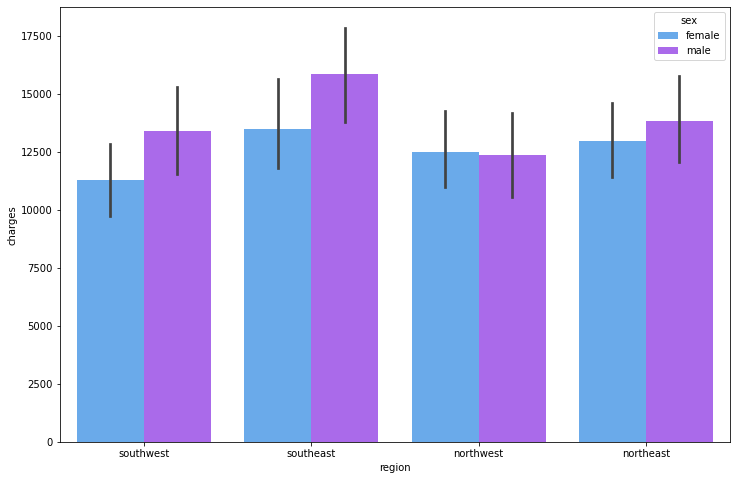

In [6]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', 
data=df, palette='cool')

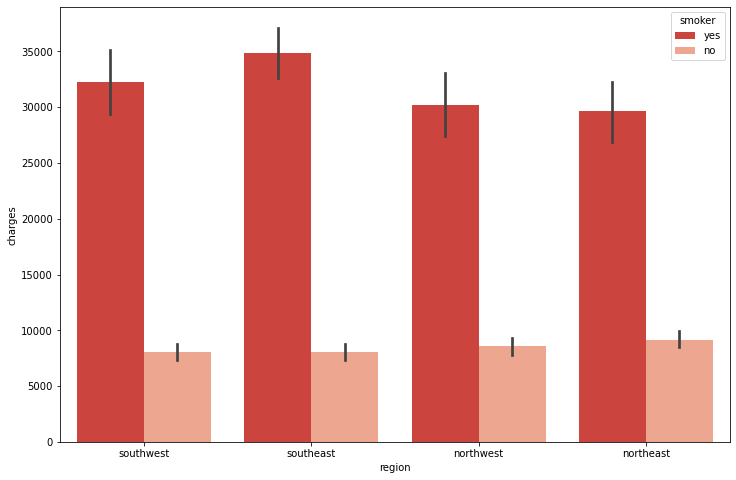

In [7]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='smoker', 
data=df, palette='Reds_r')

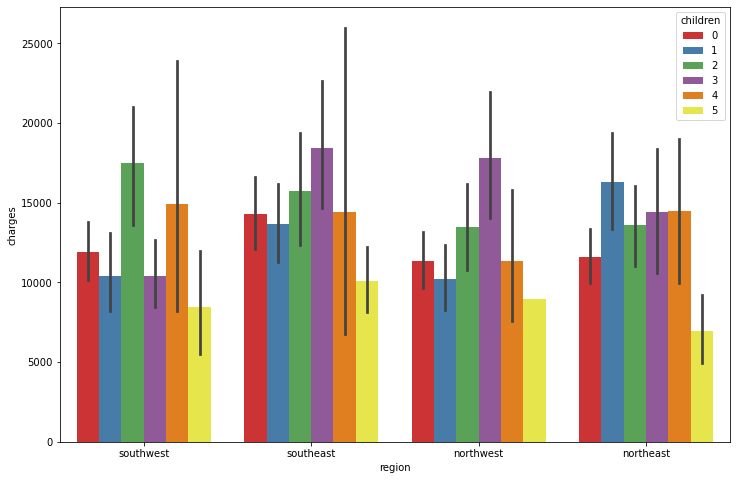

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', 
data=df, palette='Set1')

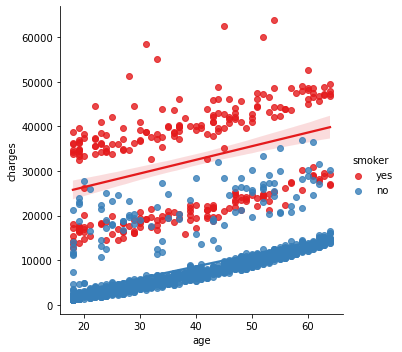

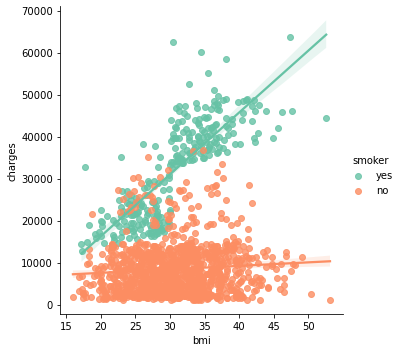

In [9]:
ax = sns.lmplot(x='age', y='charges', hue='smoker', 
                data=df, palette='Set1')
ax = sns.lmplot(x='bmi', y='charges', hue='smoker', 
                data=df, palette='Set2')

In [10]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')

In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

In [12]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x,y,test_size=0.2, random_state=0)

In [14]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = linear_reg.predict(x_test)

In [16]:
R2 = metrics.r2_score(y_test, y_pred)
rmse = (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 : {0:.3f}'.format(R2))
print('RMSE : {0:.3f}'.format(rmse))

R2 : 0.800
RMSE : 5643.220


In [17]:
importance = linear_reg.coef_
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
for i, v in zip(variables, importance):
    print('Feature: %s, Score %.5f' % (i,v))

Feature: age, Score 253.99185
Feature: sex, Score -24.32455
Feature: bmi, Score 328.40262
Feature: children, Score 443.72930
Feature: smoker, Score 23568.87948
Feature: region, Score -288.50857
